### <u>Question: the worker of the decade??</u>
who was the investigator with highes reports per decade.

1-create a subset with the investigator/year. Clean all the data (NaN, and investigator names. Investigators with less than 1 report are not evaluated)

2- First we will see the reports/decade to see if it makes sense use decades or maybe we have to increase the baskets

3-find out who was the top reporter of the decade


In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pycountry

In [143]:
final_sharks = pd.read_csv("../data/final_sharks.csv")

In [144]:
pd.set_option('display.max_columns', None)

In [145]:
final_sharks.columns

Index(['Unnamed: 0', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'original order', 'year_c', 'month_c', 'day_c', 'Act_class', 'date_c',
       'day_of_week'],
      dtype='object')

In [146]:
final_sharks['Investigator or Source'].value_counts()

Investigator or Source
C. Moore, GSAF                                                       84
C. Creswell, GSAF                                                    80
S. Petersohn, GSAF                                                   79
R. Collier                                                           54
R. Collier, GSAF                                                     48
                                                                     ..
Miami Herald, 5/18/1997                                               1
O. Gadig; Globo, 4/24/1997                                            1
J. Delvecchio & D. Sygall, Sydney Morning Herald, 2/4/1997, p.2       1
Sunday Mail (QLD), 1/26/1997, p.2; Hobart Mercury, 1/27/1997, p.2     1
S.W. Baker                                                            1
Name: count, Length: 4630, dtype: int64

In [147]:
investigator1 = final_sharks[['Investigator or Source' , 'year_c']]

In [148]:
investigator1 = investigator1.dropna(how='any')


In [149]:
investigator1.isna().sum()

Investigator or Source    0
year_c                    0
dtype: int64

In [150]:
investigator1.sample()

,Investigator or Source,year_c
529,Facebook.com,2014.0


In [151]:
investigator1.shape

(5634, 2)

In [152]:
investigator1 = investigator1.drop_duplicates()

In [153]:
investigador2 = investigator1[investigator1['Investigator or Source'].duplicated(keep=False)]

In [154]:
investigator2.shape

(611, 2)

In [155]:
investigator2['Investigator or Source'].value_counts()

Investigator or Source
C. Moore, GSAF                                              81
M. Levine, GSAF                                             36
R. Collier, GSAF                                            34
C. Creswell, GSAF                                           27
S. Petersohn, GSAF                                          17
                                                            ..
A. De Maddalena; Perfetti (1989), M. Zuffa (pers. Comm.)     2
S. Combs                                                     2
E.Pace, FSAF                                                 2
C. Johannson, GSAF                                           2
P. Tichener                                                  2
Name: count, Length: 134, dtype: int64

In [156]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace(" ", "")

In [157]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("C. Moore. GSAF", "C. Moore, GSAF")

In [158]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("R. Collier", "R. Collier, GSAF")

In [159]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("C.Moore, GSAF", "C. Moore, GSAF")

In [160]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("S. Petersohn", "S. Petersohn, GSAF")

In [161]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("J. Borg, p.74; L. Taylor (1993), pp.102-103 ", "J. Borg")

In [162]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("J. Borg, p.74; L. Taylor (1993), pp.104-105" , "J. Borg")

investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("J. Borg, p.74; L. Taylor (1993), pp.104-105" , "J. Borg")

In [163]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("J. Borg, p.76; L. Taylor (1993), pp.106-107" , "J. Borg")

In [164]:
investigator2['Investigator or Source']= investigator2['Investigator or Source'].replace("T. Wallett, p.27" , "T. Wallett")

In [165]:
investigator2['Investigator or Source'].value_counts().head(50)

Investigator or Source
C. Moore, GSAF                                     81
M. Levine, GSAF                                    36
R. Collier, GSAF                                   34
C. Creswell, GSAF                                  27
S. Petersohn, GSAF                                 17
GSAF                                               15
J. Borg                                            13
E. Ritter, GSAF                                    13
T. Peake, GSAF                                     12
E. Pace, FSAF                                      11
G. Van Grevelynghe                                  9
M. Vorenberg, GSAF                                  9
R.D. Weeks, GSAF                                    9
C. Black, GSAF                                      9
A. Gifford, GSAF                                    9
JCOnline                                            8
MEDSAF                                              7
W. Leander                                          7
T. Wa

[Text(0, 0.5, 'nº reports')]

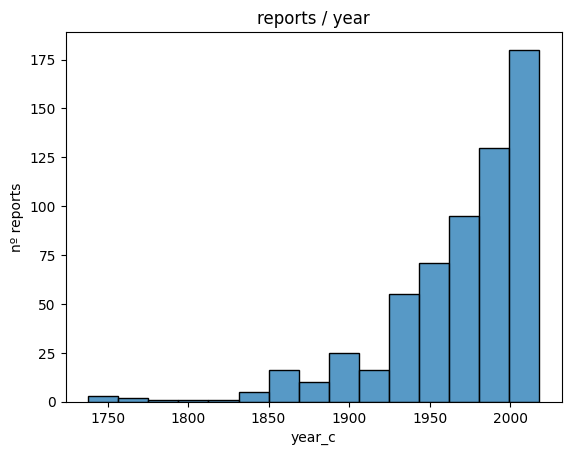

In [184]:
plot1=sns.histplot(x=investigator2.year_c,bins=15)
plt.title('reports / year')
plot1.set(ylabel="nº reports")

In [167]:
###after the barplot it is clear that we'd better divide it in three groups of 20 yares starting in 1960

In [171]:
investigator2.head()

,Investigator or Source,year_c
0,"R. Collier, GSAF",2018.0
3,"B. Myatt, GSAF",2018.0
11,"C. Creswell, GSAF",2018.0
44,TrackingSharks.com,2018.0
53,"R. Collier, GSAF",2017.0


In [172]:
investigador2['year_c'].max()

2018.0

### we create a function to introduce a year and get the top investigator for the next 20 years
it is retuning us the top investigator as well as how many reports done during those 20 years

In [179]:
def top_investigator(year):
    """This function, when introduced a year, returns the name of the name of the investigator with more reports 
    publish during the next 20 years starting from the year introduced"""
    cond1=investigador2['year_c'] >= year
    cond2=investigador2['year_c'] < (year +20)
    df=investigador2[(cond1) & (cond2)] 
    top_inv = df['Investigator or Source'].value_counts().head(1)
    return top_inv

In [180]:
top_investigator(1960)

Investigator or Source
M. Levine, GSAF    10
Name: count, dtype: int64

In [181]:
top_investigator(1980)

Investigator or Source
A. Gifford, GSAF    8
Name: count, dtype: int64

In [182]:
top_investigator(2000)

Investigator or Source
C. Creswell, GSAF    17
Name: count, dtype: int64